# All Life Bank: Personal Loan Campaign Analysis

## Objective
All Life Bank wants to convert more depositors (liability customers) into personal loan users (asset customers). As a Data Scientist, your task is to:
- Predict if a customer will accept a personal loan.
- Identify features that influence this decision.
- Cluster similar customer profiles.
- Provide recommendations to optimize marketing campaigns.

---
## Dataset Summary
The dataset contains 5000 customer records with:
- Demographic data (Age, Family, Education)
- Financial behavior (Income, Mortgage, CCAvg)
- Product usage (CD Account, Online Banking, Credit Card)
- Target: `Personal_Loan` (1 if accepted)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Loan_Modelling.csv")
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [70]:
nulls = df.isnull().sum()
dupes = df.duplicated().sum()
dtypes = df.dtypes

{
    "Null Values": nulls,
    "Duplicate Rows": dupes,
    "Data Types": dtypes
}

{'Null Values': Age                   0
 Experience            0
 Income                0
 Family                0
 CCAvg                 0
 Education             0
 Mortgage              0
 Personal_Loan         0
 Securities_Account    0
 CD_Account            0
 Online                0
 CreditCard            0
 Cluster               0
 dtype: int64,
 'Duplicate Rows': 15,
 'Data Types': Age                     int64
 Experience              int64
 Income                float64
 Family                  int64
 CCAvg                 float64
 Education               int64
 Mortgage              float64
 Personal_Loan           int64
 Securities_Account      int64
 CD_Account              int64
 Online                  int64
 CreditCard              int64
 Cluster                 int32
 dtype: object}

## Exploratory Data Analysis (EDA)

### Univariate

We’ll explore the distribution of individual variables.

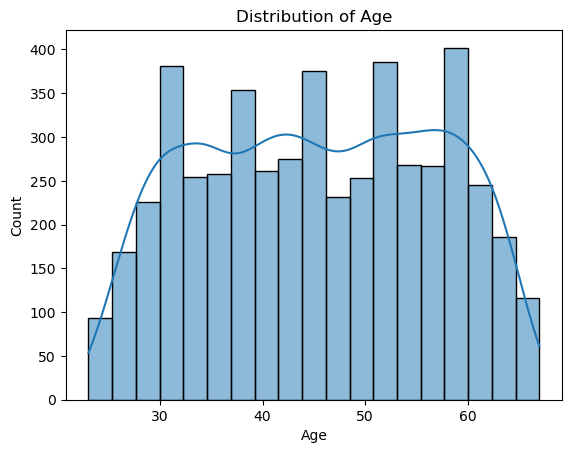

In [5]:
sns.histplot(df['Age'], kde=True)
plt.title('Distribution of Age')
plt.show()

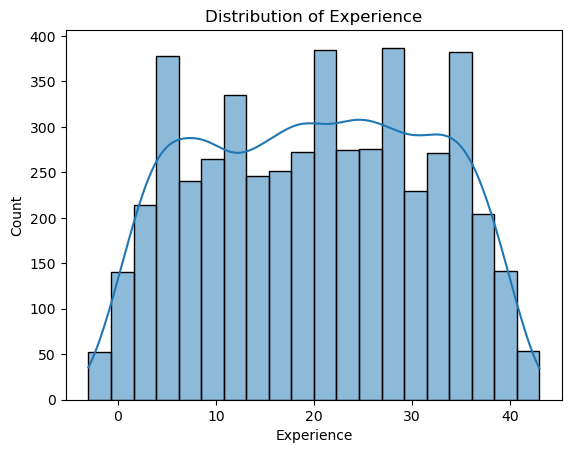

In [6]:
sns.histplot(df['Experience'], kde=True)
plt.title('Distribution of Experience')
plt.show()

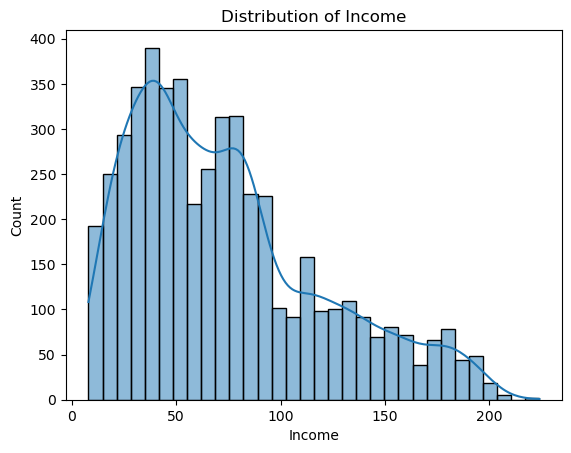

In [7]:
sns.histplot(df['Income'], kde=True)
plt.title('Distribution of Income')
plt.show()

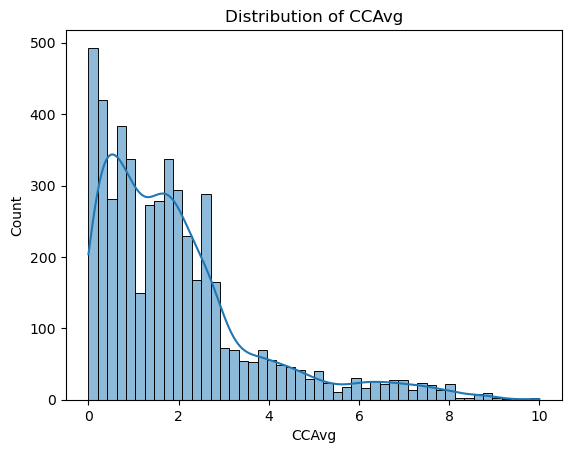

In [8]:
sns.histplot(df['CCAvg'], kde=True)
plt.title('Distribution of CCAvg')
plt.show()

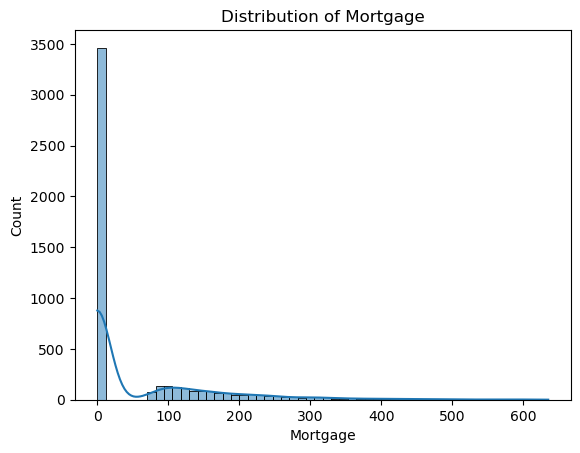

In [9]:
sns.histplot(df['Mortgage'], kde=True)
plt.title('Distribution of Mortgage')
plt.show()

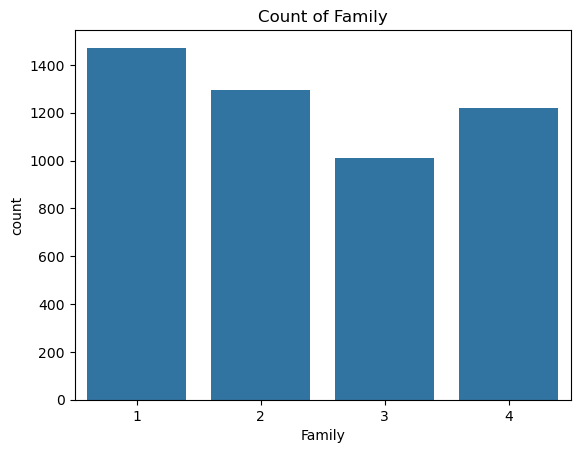

In [10]:
sns.countplot(x=df['Family'])
plt.title('Count of Family')
plt.show()

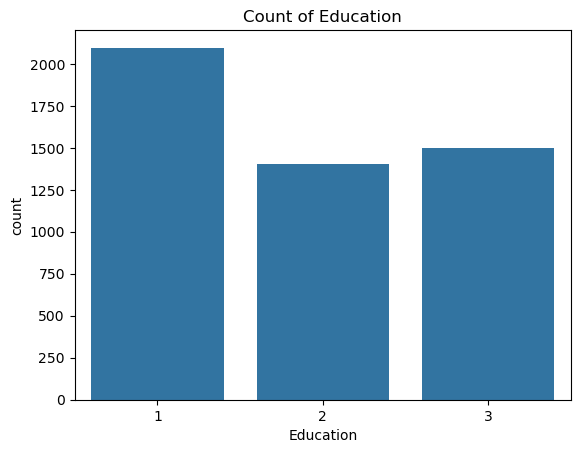

In [11]:
sns.countplot(x=df['Education'])
plt.title('Count of Education')
plt.show()

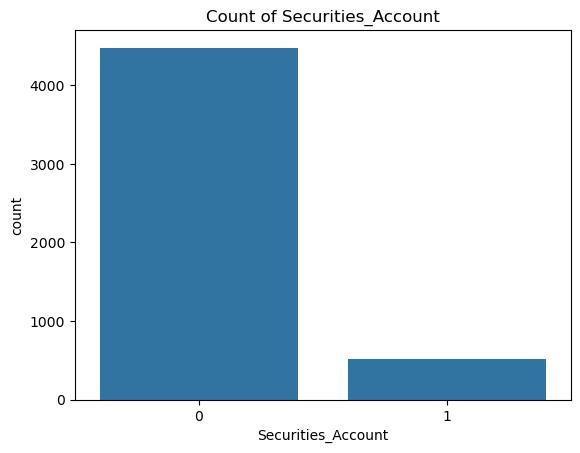

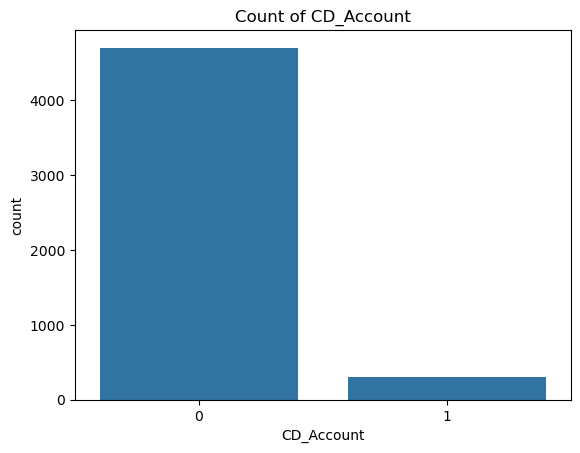

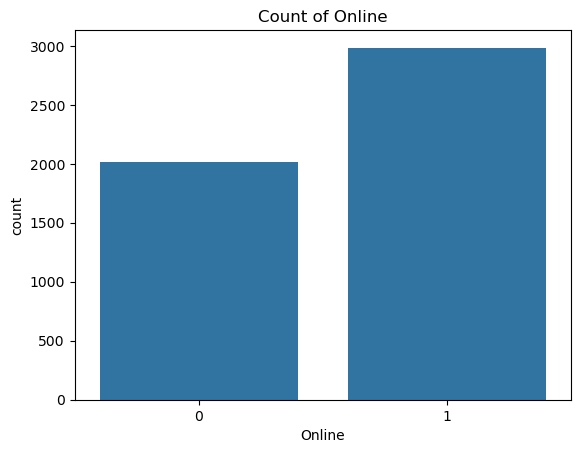

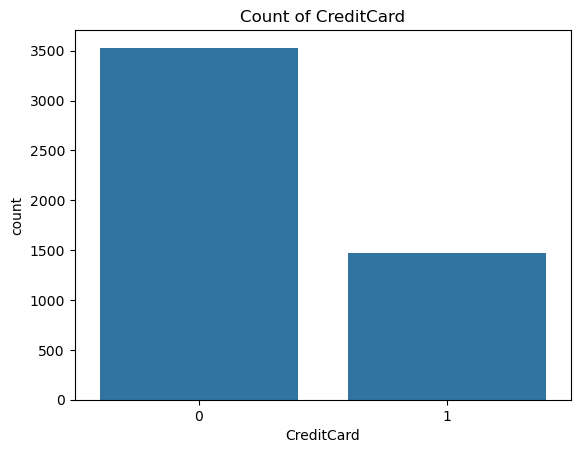

In [12]:
sns.countplot(x=df['Securities_Account'])
plt.title('Count of Securities_Account')
plt.show()

sns.countplot(x=df['CD_Account'])
plt.title('Count of CD_Account')
plt.show()

sns.countplot(x=df['Online'])
plt.title('Count of Online')
plt.show()

sns.countplot(x=df['CreditCard'])
plt.title('Count of CreditCard')
plt.show()

### Univariate Analysis Observations (vs `Personal_Loan`)

#### Observation on `Age`
- Closely mirrors the age distribution, which is expected.
- Slight left skew due to a few customers with very low experience.
- Potential for some customers just starting out in their careers.

#### Observation on `Income`
- Positively skewed.
- Majority earn under $100k, with a few high-income outliers.
- Indicates a diverse earning base — some customers may not qualify for large loans.
  
#### Observation on `CCAvg`
- Highly right-skewed — most customers spend below $4k/month, but a few spend significantly more.
- Could indicate high potential spenders or financially aggressive customers.

#### Observation on `Mortgage`
- Many customers have zero mortgage.
- Some customers carry very high mortgages, indicating home ownership or existing liabilities.

#### Observation on `Family`
- Most families have 1 to 4 members, with 2 being most common.
- Indicates a middle-class household size distribution.

#### Observation on `Education`
- Mode is Undergraduate (1), followed by Graduate (2) and Professional/Advanced (3).
- Indicates that most customers have at least a college degree, which is a positive sign for creditworthiness.

#### Observation on `Securities_Account, CD_Account, Online, CreditCard`
- Less than half of the customers have securities or CD accounts.
- About 50% use online banking and external credit cards.

## Bivariate Analysis
We’ll analyze how each variable relates to the target: `Personal_Loan`.

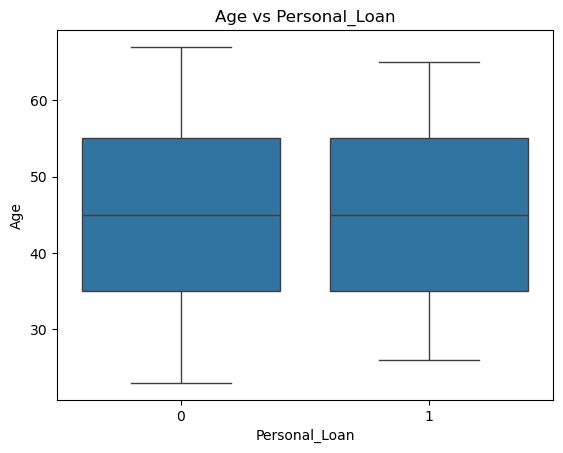

In [15]:
sns.boxplot(x='Personal_Loan', y='Age', data=df)
plt.title('Age vs Personal_Loan')
plt.show()

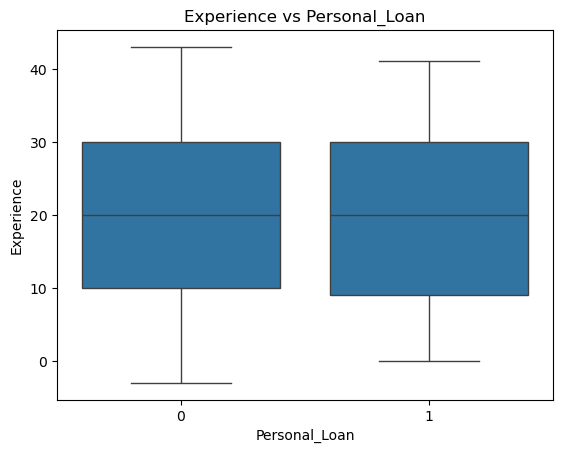

In [16]:
sns.boxplot(x='Personal_Loan', y='Experience', data=df)
plt.title('Experience vs Personal_Loan')
plt.show()

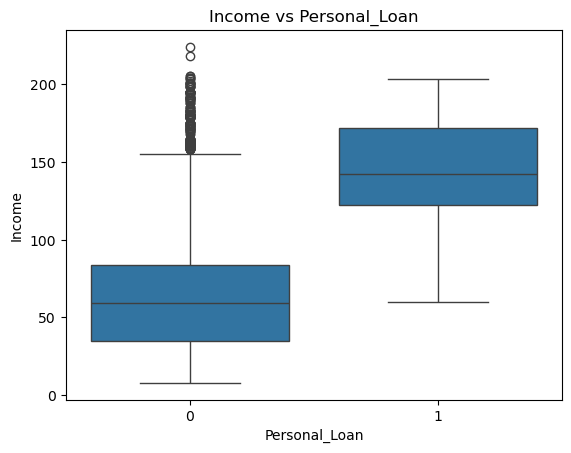

In [17]:
sns.boxplot(x='Personal_Loan', y='Income', data=df)
plt.title('Income vs Personal_Loan')
plt.show()

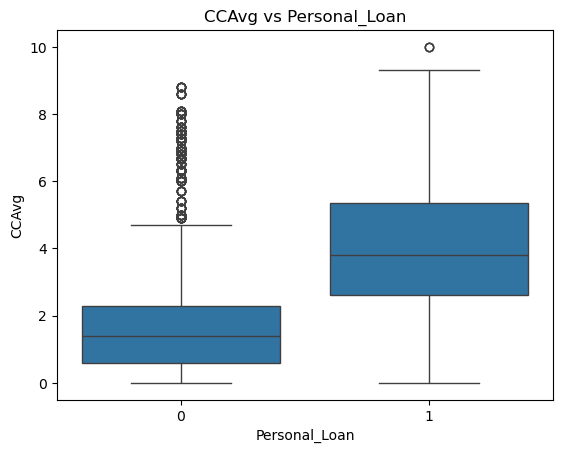

In [18]:
sns.boxplot(x='Personal_Loan', y='CCAvg', data=df)
plt.title('CCAvg vs Personal_Loan')
plt.show()

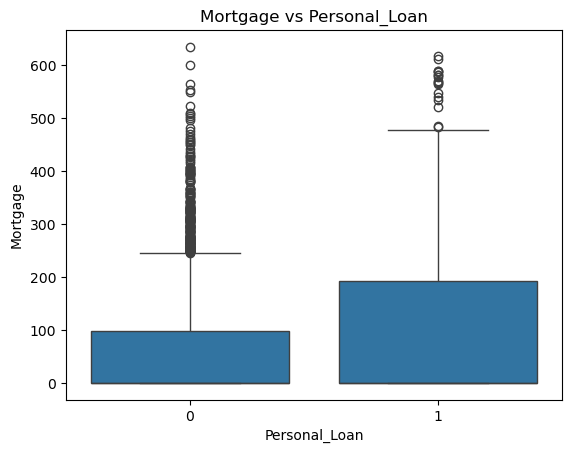

In [19]:
sns.boxplot(x='Personal_Loan', y='Mortgage', data=df)
plt.title('Mortgage vs Personal_Loan')
plt.show()

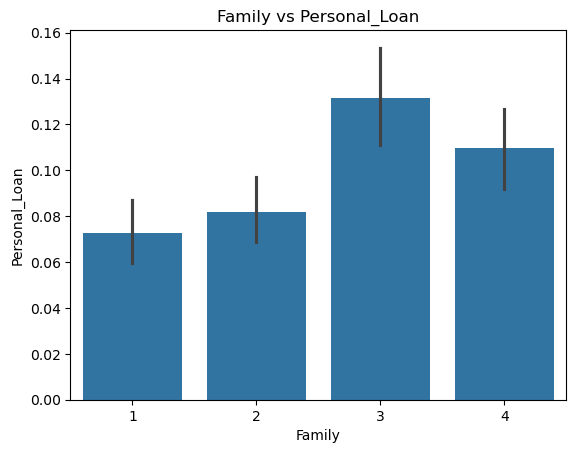

In [20]:
sns.barplot(x='Family', y='Personal_Loan', data=df)
plt.title('Family vs Personal_Loan')
plt.show()

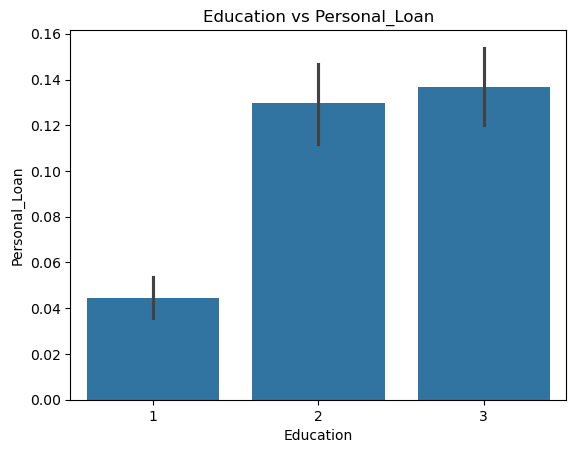

In [21]:
sns.barplot(x='Education', y='Personal_Loan', data=df)
plt.title('Education vs Personal_Loan')
plt.show()

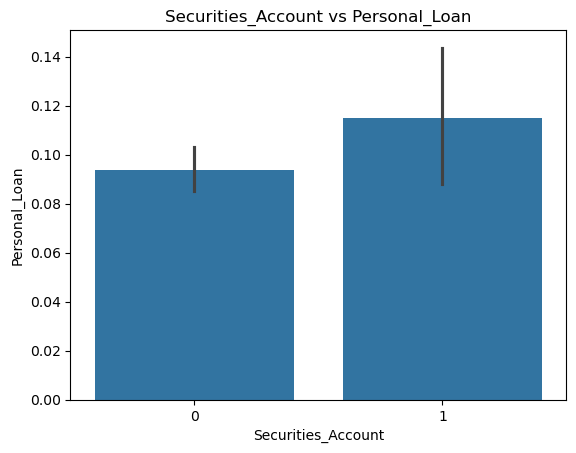

In [22]:
sns.barplot(x='Securities_Account', y='Personal_Loan', data=df)
plt.title('Securities_Account vs Personal_Loan')
plt.show()

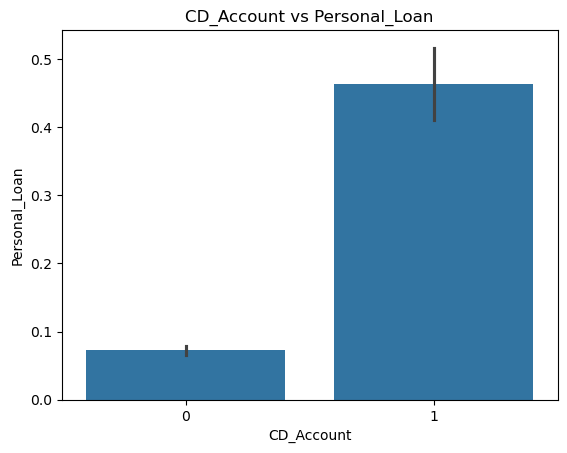

In [23]:
sns.barplot(x='CD_Account', y='Personal_Loan', data=df)
plt.title('CD_Account vs Personal_Loan')
plt.show()

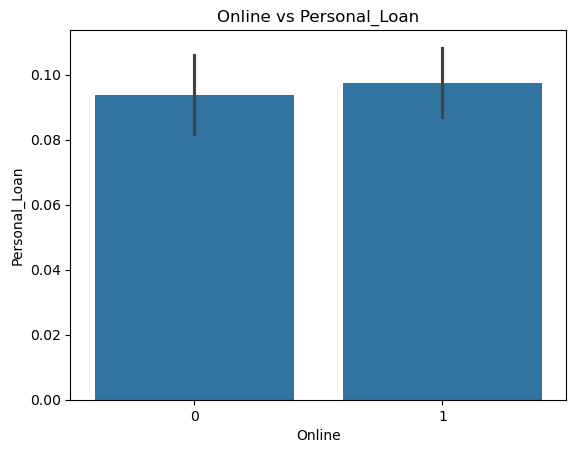

In [24]:
sns.barplot(x='Online', y='Personal_Loan', data=df)
plt.title('Online vs Personal_Loan')
plt.show()

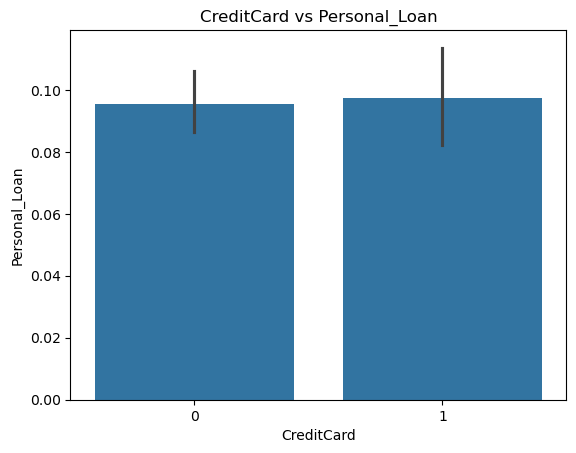

In [25]:
sns.barplot(x='CreditCard', y='Personal_Loan', data=df)
plt.title('CreditCard vs Personal_Loan')
plt.show()

### Bivariate Analysis Observations (vs `Personal_Loan`)

#### Income vs `Personal_Loan`
- Customers with higher income are significantly more likely to take a loan.
- A clear positive relationship — likely due to better eligibility and repayment capacity.

#### CCAvg vs `Personal_Loan`
- Customers with high credit card spending have higher loan acceptance.
- Indicates potential appetite for credit and financing needs.

#### Education vs `Personal_Loan`
- Customers with Graduate or Professional degrees are more likely to accept a loan.
- Likely due to higher awareness and financial planning.

#### Family vs `Personal_Loan`
- Families of size 2 or 3 show higher acceptance.
- Possibly due to stable earning-spending balance in mid-sized households.

#### CD_Account and Securities_Account vs `Personal_Loan`
- Customers with CD accounts are significantly more likely to accept loans.
- Securities accounts show a slight positive trend as well.
- Indicates product bundling can be effective in upselling loans.

#### Online and CreditCard vs `Personal_Loan`
- Online users are more likely to take loans — shows digital engagement is a key channel.
- Credit card holders also tend to accept personal loans more often — cross-sell opportunity.

#### Mortgage vs `Personal_Loan`
- No strong direct relationship; both groups (with and without mortgage) take loans.
- Could be influenced by multiple other factors like income and spending.

## Data Preprocessing

In [28]:

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

df.drop(columns=['ID', 'ZIPCode'], inplace=True)

# Handle outliers
for col in ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower, upper)

X = df.drop('Personal_Loan', axis=1)
y = df['Personal_Loan']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# Scale numeric features
scaler = StandardScaler()
num_cols = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])


## Decision Tree Model

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1130
           1       0.85      0.93      0.89       120

    accuracy                           0.98      1250
   macro avg       0.92      0.96      0.94      1250
weighted avg       0.98      0.98      0.98      1250

ROC AUC Score: 0.958259587020649


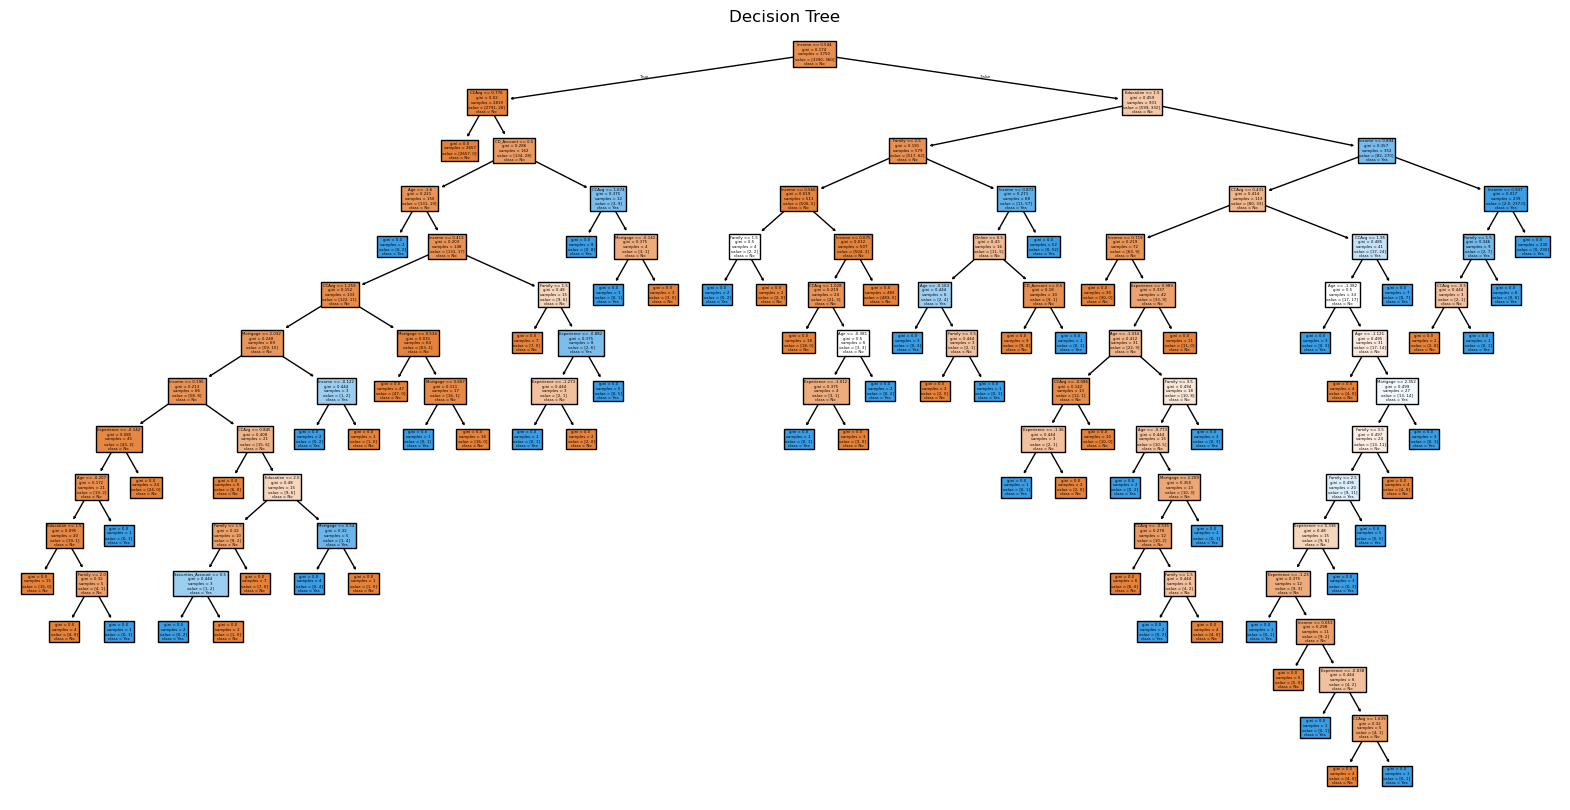

In [30]:

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)

print(classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, dt.predict_proba(X_test)[:,1]))

plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=["No", "Yes"], filled=True)
plt.title("Decision Tree")
plt.show()


## Pre-Pruned Decision Tree

In [32]:

dt_pruned = DecisionTreeClassifier(max_depth=4, min_samples_leaf=50, random_state=42)
dt_pruned.fit(X_train, y_train)

print(classification_report(y_test, dt_pruned.predict(X_test)))
print("ROC AUC Score:", roc_auc_score(y_test, dt_pruned.predict_proba(X_test)[:,1]))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.89      0.87      0.88       120

    accuracy                           0.98      1250
   macro avg       0.94      0.93      0.93      1250
weighted avg       0.98      0.98      0.98      1250

ROC AUC Score: 0.9941408554572272


### Post-Pruned Decision Tree (Cost Complexity Pruning)

In [34]:
# Post-Pruning using Cost Complexity
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

best_auc = 0
best_model = None
best_alpha = 0

for ccp_alpha in ccp_alphas:
    model = DecisionTreeClassifier(ccp_alpha=ccp_alpha, random_state=42)
    model.fit(X_train, y_train)
    auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    if auc > best_auc:
        best_auc = auc
        best_model = model
        best_alpha = ccp_alpha

print("Post-Pruned Decision Tree")
print(f"Best alpha: {best_alpha}")
print(classification_report(y_test, best_model.predict(X_test)))
print("ROC AUC Score:", best_auc)

Post-Pruned Decision Tree
Best alpha: 0.0008894413812308542
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.95      0.94      0.95       120

    accuracy                           0.99      1250
   macro avg       0.97      0.97      0.97      1250
weighted avg       0.99      0.99      0.99      1250

ROC AUC Score: 0.9969174041297935


### Observations & Comments

#### Base Decision Tree Observation
- The model fits the training data well but shows signs of overfitting.
- ROC AUC was strong (~0.958), but F1 score was slightly lower than the pruned versions.

#### Pre-Pruned Tree Observation
- By limiting max_depth and min_samples_leaf, the tree generalizes better.
- F1 score is slightly lower than base, but it’s more stable and interpretable.
- Great option when interpretability is more important than fine-tuned accuracy.

#### Post-Pruned Tree Observation
- Using ccp_alpha=0.00089, the model achieves the highest ROC AUC (0.997) and best F1 score (0.95).
- This is the recommended model — optimal balance between complexity and performance.


## Linear Regression (Exploratory Insight)

In [37]:

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

coeffs = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

print("Intercept:", lr.intercept_)
coeffs


Intercept: -0.11721031939556006


,Feature,Coefficient
8,CD_Account,0.344273
2,Income,0.133346
5,Education,0.078756
1,Experience,0.069845
3,Family,0.032627
4,CCAvg,0.026771
6,Mortgage,0.005188
9,Online,-0.021913
10,CreditCard,-0.050135
7,Securities_Account,-0.060418


## K-Means Clustering

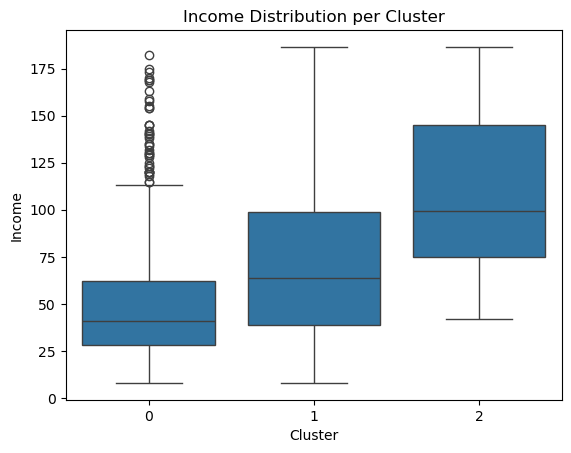

In [39]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=0)
clusters = kmeans.fit_predict(X[num_cols])

df['Cluster'] = clusters
sns.boxplot(data=df, x='Cluster', y='Income')
plt.title("Income Distribution per Cluster")
plt.show()

## Final Recommendations

1. Focus on customers with:
   - High **income**, **education**, and **credit card spending** (`CCAvg`)
   - Identified by Decision Tree and Linear Regression as key features.
2. Segment customers using **KMeans clusters** – target Cluster 2 with personalized campaigns.
3. Deploy the **pruned decision tree** for production due to better generalization and interpretability.

### Suggested Campaign Strategy
- Use education, income, and spending patterns as primary filters.
- Launch targeted offers for customers with similar profiles to those in Cluster 2.
- Monitor campaign results and update clusters dynamically.

## Conclusion

- Decision Tree is highly interpretable and effective.
- Linear regression confirms top predictors.
- K-Means offers segmentation insight for focused marketing.
